### Week 1 .1
1. join all the data together   
2. plot the distribution of numeric columns 
3. create box-plot on numeric columns 
4. data profiling on all columns (hint: use the relevant package from boston_crime notebook)

### 1. Join all the data together

In [31]:
import pandas as pd

crime = pd.read_csv("crime.csv")
district = pd.read_csv("district_mapping.csv")

C:\Users\18202\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [33]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DISTRICT       12 non-null     object
 1   DISTRICT_NAME  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [34]:
merge = pd.merge(crime, district)    # merge = pd.merge(crime, district, on = "DISTRICT")   ??

In [35]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326046 entries, 0 to 326045
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      326046 non-null  object 
 1   OFFENSE_CODE         326046 non-null  int64  
 2   OFFENSE_CODE_GROUP   326046 non-null  object 
 3   OFFENSE_DESCRIPTION  326046 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       326046 non-null  object 
 6   SHOOTING             1053 non-null    object 
 7   OCCURRED_ON_DATE     326046 non-null  object 
 8   YEAR                 326046 non-null  int64  
 9   MONTH                326046 non-null  int64  
 10  DAY_OF_WEEK          326046 non-null  object 
 11  HOUR                 326046 non-null  int64  
 12  UCR_PART             325953 non-null  object 
 13  STREET               316096 non-null  object 
 14  Lat                  305708 non-null  float64
 15  Long             

In [36]:
merge.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DISTRICT_NAME
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,3/10/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",Hyde Park
1,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,3/10/2018 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)",Hyde Park
2,I182080041,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,484,NaN,3/10/2018 17:18,2018,10,Wednesday,17,Part Three,BELNEL RD,42.260599,-71.103061,"(42.26059891, -71.10306140)",Hyde Park
3,I182080011,3114,Investigate Property,INVESTIGATE PROPERTY,E18,520,NaN,3/10/2018 19:03,2018,10,Wednesday,19,Part Three,HYDE PARK AVE,42.256216,-71.124019,"(42.25621592, -71.12401947)",Hyde Park
4,I182080010,3114,Investigate Property,INVESTIGATE PROPERTY,E18,520,NaN,3/10/2018 19:02,2018,10,Wednesday,19,Part Three,HYDE PARK AVE,42.256216,-71.124019,"(42.25621592, -71.12401947)",Hyde Park


In [37]:
print(merge.shape)

(326046, 18)


In [38]:
print(crime.shape)

(327820, 17)


In [39]:
print(district.shape)

(12, 2)


### 2. Plot the distribution of numeric columns
-line chart
-bar chart
-pie chart
-histogram

In [40]:
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


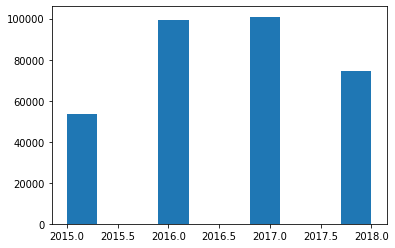

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(crime['YEAR'])
plt.show()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


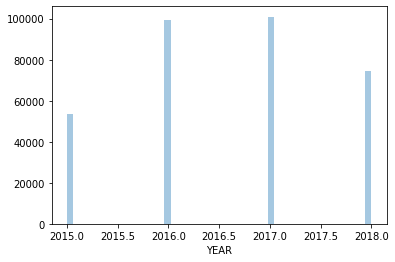

In [42]:
sns.distplot(crime['YEAR'], hist=True, kde=False,)

Text(0, 0.5, 'C')

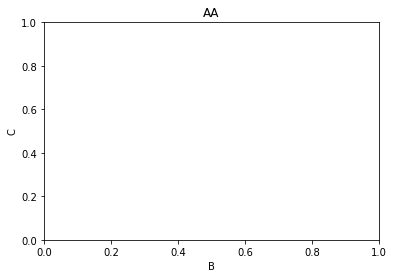

In [43]:
plt.title('AA')
plt.xlabel('B')
plt.ylabel('C')

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
year = crime['YEAR']
print(year)

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
327815    2016
327816    2015
327817    2015
327818    2016
327819    2015
Name: YEAR, Length: 327820, dtype: int64


In [45]:
y = np.sin(year)

In [46]:
print(y)

0         0.890078
1         0.890078
2         0.890078
3         0.890078
4         0.890078
            ...   
327815   -0.784868
327816   -0.945494
327817   -0.945494
327818   -0.784868
327819   -0.945494
Name: YEAR, Length: 327820, dtype: float64


C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


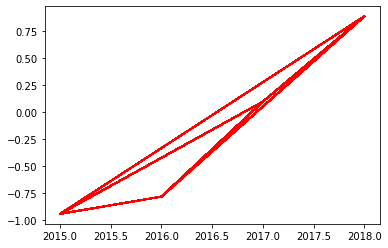

In [47]:
plt.plot(year,y,'r')   #red 

C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


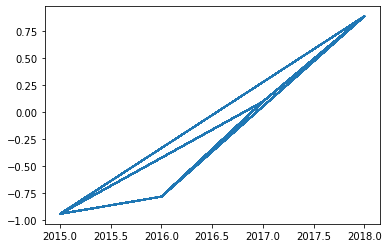

In [48]:
plt.plot(year,y)   #blue

C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


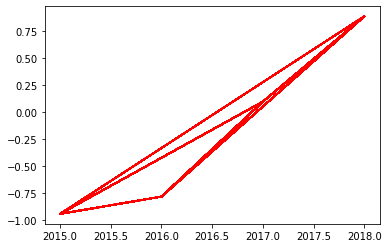

In [49]:
plt.plot(year,y,'r--')   #dotted line

C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\18202\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


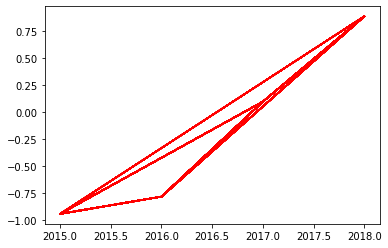

In [50]:
plt.plot(year,y,'r:')    

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

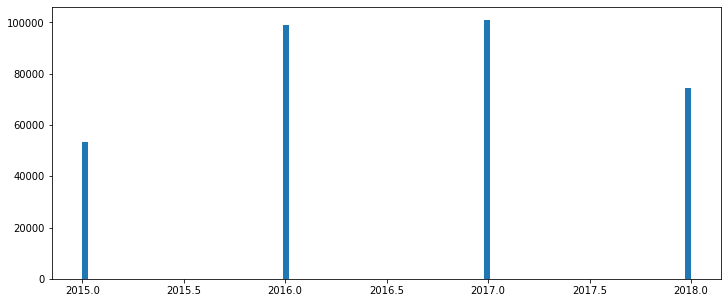

In [52]:
plt.figure(figsize=(12,5))
plt.hist((year), bins = 100)
plt.show()                   # figsize 设置宽度，高度。数据是Series X
                             # 把年份总共设置成100
                             # plt.show() 展示结果

In [53]:
month = crime['MONTH']
print(month)

0         10
1          8
2         10
3         10
4         10
          ..
327815     6
327816     7
327817     7
327818     5
327819     6
Name: MONTH, Length: 327820, dtype: int64


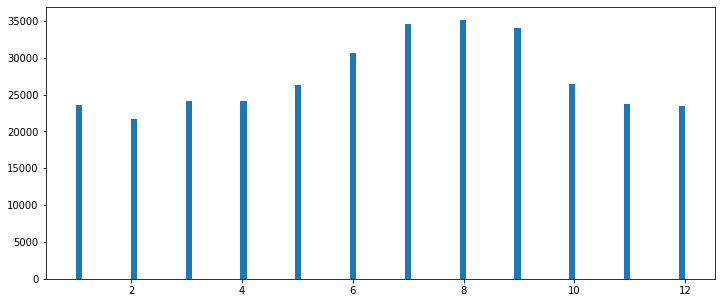

In [54]:
plt.figure(figsize=(12,5))
plt.hist(month, bins = 100)
plt.show()                           

In [55]:
hour = crime['HOUR']
print(hour)

0         20
1         20
2         19
3         20
4         20
          ..
327815    17
327816    13
327817    13
327818    19
327819     0
Name: HOUR, Length: 327820, dtype: int64


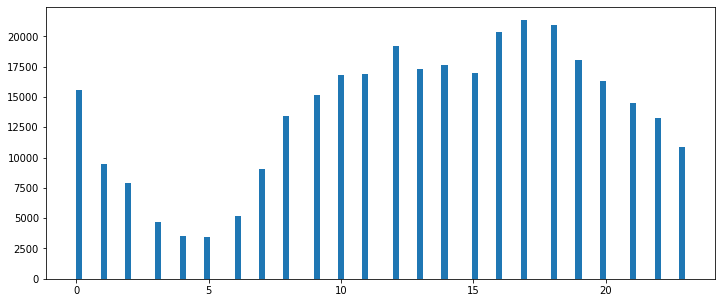

In [56]:
plt.figure(figsize=(12,5))
plt.hist(hour, bins = 100)
plt.show()                           

#   plt.figure(figsize=(16,8))
#   year.value_counts().plot.bar()
#   plt.show()

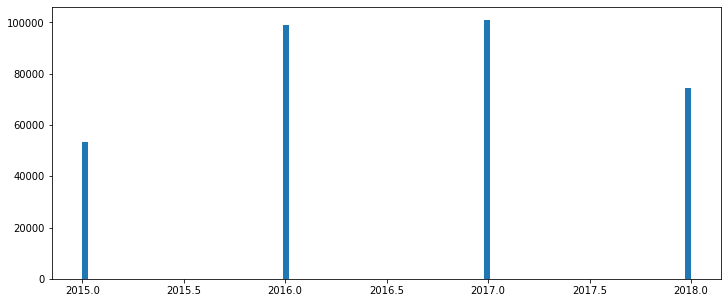

In [57]:
plt.figure(figsize=(12,5))
plt.hist(year, bins = 100)
plt.show()   

In [62]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("month")
ax = sns.boxplot(x=tips["total_year"])

ValueError: 'month' is not one of the example datasets.

In [74]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
sns.set_theme(style="whitegrid")
year = sns.load_dataset("year")
ax = sns.boxplot(x=tips["year"])

ValueError: 'year' is not one of the example datasets.

In [76]:
year.isnull().values.any()

False

In [77]:
month.isnull().values.any()

False

In [78]:
hour.isnull().values.any()

False

In [79]:
year.isnull().any()

False

In [80]:
year.isnull().all()

False

In [84]:
year.unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [85]:
year.value_counts()

2017    100938
2016     99134
2018     74356
2015     53392
Name: YEAR, dtype: int64

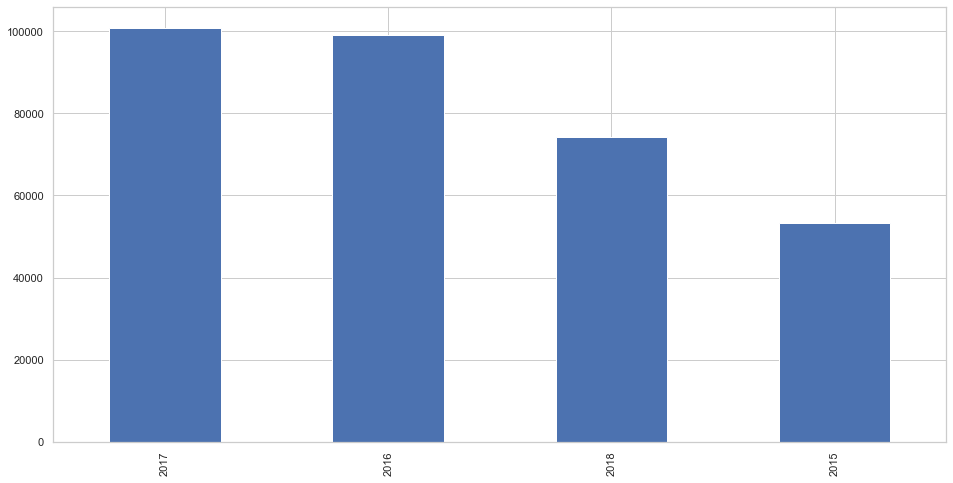

In [94]:
plt.figure(figsize=(16,8))
year.value_counts().plot.bar()
plt.show()

In [95]:
month.value_counts()

8     35137
7     34640
9     34023
6     30622
10    26437
5     26242
3     24156
4     24108
11    23685
1     23625
12    23484
2     21661
Name: MONTH, dtype: int64

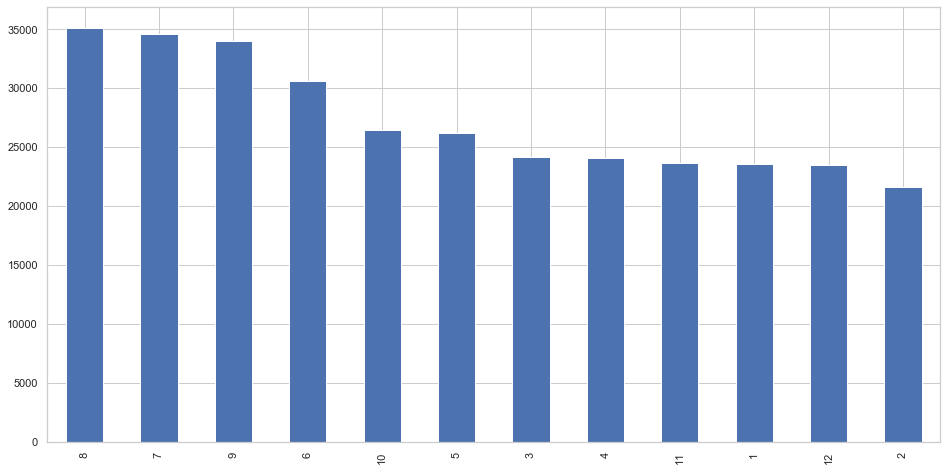

In [96]:
plt.figure(figsize=(16,8))
month.value_counts().plot.bar()
plt.show()